In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
jobs_translated = pd.read_csv('jobs_translated.csv')

In [7]:
jobs_translated.columns

Index(['Position', 'County City', 'Region', 'Company Name', 'Job Benefits',
       'Work Nature', 'Number of People Required', 'Working Experience',
       'Education Requirements', 'Proficiency in tools',
       'Number of employees'],
      dtype='object')

In [8]:
languages = pd.Series(
    [
        "JavaScript",
        "Excel",
        "Python",
        "Java",
        "C",
        "C++",
        "C#",
        "R",
        "PHP",
        "TypeScript",
        "Swift",
        "Objective-C",
        "Rust",
        "Go",
        "Kotlin",
        "Matlab",
        "Ada",
        "Dart",
        "Ruby",
        "PowerShell",
        "VBA",
        "Assembly Language",
        "SQL",
        "HTML",
        "CSS",
        "Bash",
        "Perl",
        "Lua",
        "Scala",
        "Prolog",
        "D",
        "PL/SQL",
        "Transact-SQL",
        "Haskell",
        "Logo",
        "FoxPro",
        "Delphi/Object Pascal",
        "Julia",
        "Scratch",
        "SAS",
    ]
)

In [9]:
languages_pt = pd.DataFrame(columns=["Language", "Percentage"])
languages_pt["Language"] = languages

In [10]:
jobs_translated["Proficiency in tools"].value_counts()

Proficiency in tools
Not specified                        21200
C、C++贊助提升專業能力                          565
Excel、PowerPoint、Word贊助提升專業能力          450
Python贊助提升專業能力                         370
ASP.NET、C#贊助提升專業能力                     318
                                     ...  
MCU、C、C#、C++、FPGA贊助提升專業能力                1
MCU、C、C++、Bluetooth、RF贊助提升專業能力           1
MCU、C、C++、Java贊助提升專業能力                   1
EDA、FPGA、RTL、Verilog、VHDL贊助提升專業能力        1
Linux、Python、TCP/IP、IPS贊助提升專業能力          1
Name: count, Length: 9318, dtype: int64

In [11]:
jobs_translated['Proficiency in tools'] = jobs_translated['Proficiency in tools'].astype(str)

for language in languages_pt["Language"]:
    have_language = 0
    for posting in jobs_translated["Proficiency in tools"]:
        pattern = language.replace('+', '\\+').replace('/', '\\/')
        matches = re.findall(pattern, posting)
        if matches:    
            have_language += 1
    curr_pt = have_language / len(jobs_translated[jobs_translated["Proficiency in tools"] != '不拘']["Proficiency in tools"])
    languages_pt.loc[languages_pt['Language'] == language,'Percentage'] = float(curr_pt)

In [12]:
percentage_c = languages_pt.loc[languages_pt['Language'] == 'C++', 'Percentage'].iloc[0] + languages_pt.loc[languages_pt['Language'] == 'C#', 'Percentage'].iloc[0]
languages_pt.loc[languages_pt['Language'] == 'C', 'Percentage'] -= percentage_c

percentage_js = languages_pt.loc[languages_pt['Language'] == 'JavaScript', 'Percentage'].iloc[0]
languages_pt.loc[languages_pt['Language'] == 'Java', 'Percentage'] -= percentage_js

In [13]:
languages_pt

,Language,Percentage
0,JavaScript,0.15493
1,Excel,0.062958
2,Python,0.1131
3,Java,0.077983
4,C,0.103717
5,C++,0.117298
6,C#,0.138392
7,R,0.057247
8,PHP,0.048884
9,TypeScript,0.0


C:\Users\faust\AppData\Local\Temp\ipykernel_20572\783973594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Language", x='PercentageString', data=languages_pt_nonzero, color = 'gray', orient = 'h', palette=colors)


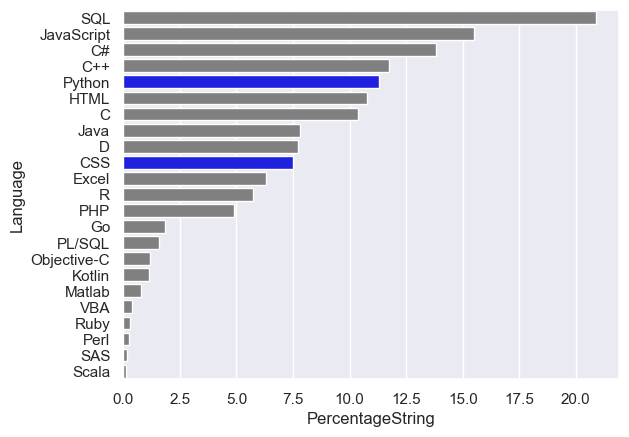

In [14]:
languages_pt_nonzero = languages_pt.loc[languages_pt['Percentage'] > 0.001].sort_values(by="Percentage", ascending=False)
languages_pt_nonzero['PercentageString'] = languages_pt_nonzero['Percentage'] * 100 

selected = ['Python', 'CSS']
sns.set_theme()
colors = ['blue' if lang in selected else 'gray' for lang in languages_pt_nonzero['Language']]
sns.barplot(y="Language", x='PercentageString', data=languages_pt_nonzero, color = 'gray', orient = 'h', palette=colors)
plt.show()

In [15]:
languages_pt_nonzero.to_csv('basic-navigation/languages.csv', index=False)